In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
import os
print(os.getcwd())  # Print the current working directory

print(os.listdir())  # Lists all files in the current directory



/content
['.config', 'DataCoSupplyChainDataset.csv', 'sample_data']


In [8]:
data = pd.read_csv('/content/DataCoSupplyChainDataset.csv', encoding='latin1')

In [9]:
data

,Type,Days for shipping (real),Days for shipment (scheduled),Benefit per order,Sales per customer,Delivery Status,Late_delivery_risk,Category Id,Category Name,Customer City,...,Order Zipcode,Product Card Id,Product Category Id,Product Description,Product Image,Product Name,Product Price,Product Status,shipping date (DateOrders),Shipping Mode
0,DEBIT,3,4,91.250000,314.640015,Advance shipping,0,73,Sporting Goods,Caguas,...,NaN,1360.0,73.0,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.750000,0.0,2/3/2018 22:56,Standard Class
1,TRANSFER,5,4,-249.089996,311.359985,Late delivery,1,73,Sporting Goods,Caguas,...,NaN,1360.0,73.0,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.750000,0.0,1/18/2018 12:27,Standard Class
2,CASH,4,4,-247.779999,309.720001,Shipping on time,0,73,Sporting Goods,San Jose,...,NaN,1360.0,73.0,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.750000,0.0,1/17/2018 12:06,Standard Class
3,DEBIT,3,4,22.860001,304.809998,Advance shipping,0,73,Sporting Goods,Los Angeles,...,NaN,1360.0,73.0,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.750000,0.0,1/16/2018 11:45,Standard Class
4,PAYMENT,2,4,134.210007,298.250000,Advance shipping,0,73,Sporting Goods,Caguas,...,NaN,1360.0,73.0,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.750000,0.0,1/15/2018 11:24,Standard Class
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10162,TRANSFER,5,4,-48.980000,151.160004,Shipping canceled,0,29,Shop By Sport,Cicero,...,NaN,627.0,29.0,NaN,http://images.acmesports.sports/Under+Armour+G...,Under Armour Girls' Toddler Spine Surge Runni,39.990002,0.0,3/14/2017 0:38,Standard Class
10163,TRANSFER,6,4,86.940002,189.000000,Shipping canceled,0,24,Women's Apparel,Sun Valley,...,NaN,502.0,24.0,NaN,http://images.acmesports.sports/Nike+Men%27s+D...,Nike Men's Dri-FIT Victory Golf Polo,50.000000,0.0,5/5/2017 1:26,Standard Class
10164,TRANSFER,4,4,43.810001,132.770004,Shipping canceled,0,29,Shop By Sport,Cumberland,...,NaN,627.0,29.0,NaN,http://images.acmesports.sports/Under+Armour+G...,Under Armour Girls' Toddler Spine Surge Runni,39.990002,0.0,1/20/2015 19:04,Standard Class
10165,TRANSFER,4,4,46.290001,132.259995,Shipping canceled,0,3,Baseball & Softball,Chandler,...,NaN,37.0,3.0,NaN,http://images.acmesports.sports/adidas+Kids%27...,adidas Kids' F5 Messi FG Soccer Cleat,34.990002,0.0,1/14/2016 23:18,Standard Class


In [10]:
print(data.info())
print(data.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10167 entries, 0 to 10166
Data columns (total 52 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Type                           10167 non-null  object 
 1   Days for shipping (real)       10167 non-null  int64  
 2   Days for shipment (scheduled)  10167 non-null  int64  
 3   Benefit per order              10167 non-null  float64
 4   Sales per customer             10167 non-null  float64
 5   Delivery Status                10167 non-null  object 
 6   Late_delivery_risk             10167 non-null  int64  
 7   Category Id                    10167 non-null  int64  
 8   Category Name                  10167 non-null  object 
 9   Customer City                  10167 non-null  object 
 10  Customer Country               10167 non-null  object 
 11  Customer Email                 10167 non-null  object 
 12  Customer Fname                 10167 non-null 

In [11]:
# Handle Missing Values
data.isnull().sum()

,0
Type,0
Days for shipping (real),0
Days for shipment (scheduled),0
Benefit per order,0
Sales per customer,0
Delivery Status,0
Late_delivery_risk,0
Category Id,0
Category Name,0
Customer City,0


In [12]:
# Replace missing values in 'Customer Fname' with "NotDetermined"
data['Customer Fname'] = data['Customer Fname'].fillna("NotDetermined")

# Create 'Customer Full Name' by combining 'Customer Fname' and 'Customer Lname'
data['Customer Full Name'] = data['Customer Fname'].astype(str) + data['Customer Lname'].astype(str)

In [13]:
data2=data.drop(['Customer Email','Product Status','Customer Street','Customer Fname','Customer Lname',
           'Product Description','Product Image','Order Zipcode','Customer Zipcode'],axis=1)
data2.shape

(10167, 44)

In [14]:
# Handle Missing Values
data2.isnull().sum()

,0
Type,0
Days for shipping (real),0
Days for shipment (scheduled),0
Benefit per order,0
Sales per customer,0
Delivery Status,0
Late_delivery_risk,0
Category Id,0
Category Name,0
Customer City,0


In [15]:
data2.columns = [col.lower().replace(' ', '_') for col in data2.columns]
data2.rename(columns=lambda x: x.replace("(", "").replace(")", ""), inplace=True)
data2.columns

Index(['type', 'days_for_shipping_real', 'days_for_shipment_scheduled',
       'benefit_per_order', 'sales_per_customer', 'delivery_status',
       'late_delivery_risk', 'category_id', 'category_name', 'customer_city',
       'customer_country', 'customer_id', 'customer_segment', 'customer_state',
       'department_id', 'department_name', 'latitude', 'longitude', 'market',
       'order_city', 'order_country', 'order_customer_id',
       'order_date_dateorders', 'order_id', 'order_item_cardprod_id',
       'order_item_discount', 'order_item_discount_rate', 'order_item_id',
       'order_item_product_price', 'order_item_profit_ratio',
       'order_item_quantity', 'sales', 'order_item_total',
       'order_profit_per_order', 'order_region', 'order_state', 'order_status',
       'product_card_id', 'product_category_id', 'product_name',
       'product_price', 'shipping_date_dateorders', 'shipping_mode',
       'customer_full_name'],
      dtype='object')

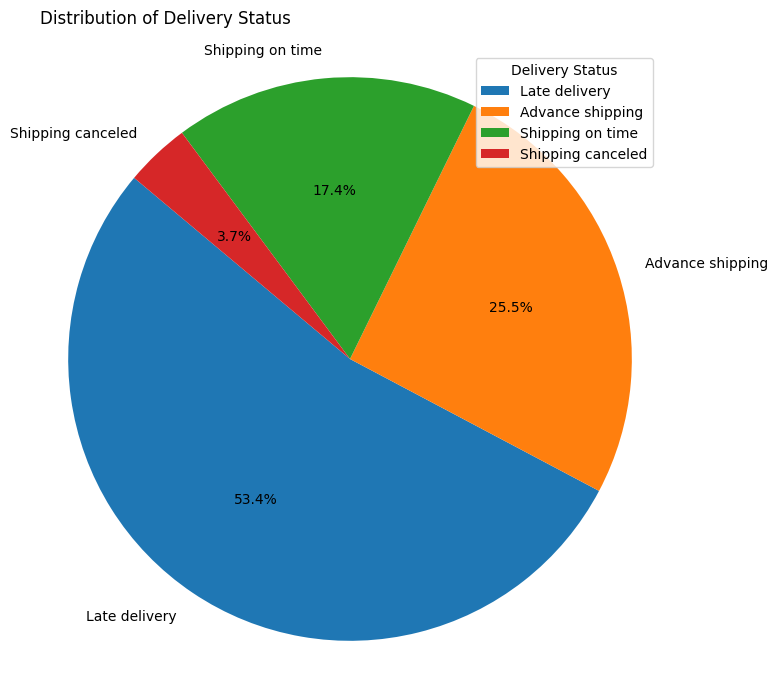

In [16]:
# Count the occurrences of each delivery status
delivery_status_counts = data2['delivery_status'].value_counts()

# Plot pie chart for delivery status
plt.figure(figsize=(8, 8))
plt.pie(delivery_status_counts, labels=delivery_status_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Delivery Status', loc='left', pad=20)
plt.axis('equal')
plt.legend(delivery_status_counts.index, title='Delivery Status', loc='best')
plt.show()

In [17]:
print(data2.columns)

Index(['type', 'days_for_shipping_real', 'days_for_shipment_scheduled',
       'benefit_per_order', 'sales_per_customer', 'delivery_status',
       'late_delivery_risk', 'category_id', 'category_name', 'customer_city',
       'customer_country', 'customer_id', 'customer_segment', 'customer_state',
       'department_id', 'department_name', 'latitude', 'longitude', 'market',
       'order_city', 'order_country', 'order_customer_id',
       'order_date_dateorders', 'order_id', 'order_item_cardprod_id',
       'order_item_discount', 'order_item_discount_rate', 'order_item_id',
       'order_item_product_price', 'order_item_profit_ratio',
       'order_item_quantity', 'sales', 'order_item_total',
       'order_profit_per_order', 'order_region', 'order_state', 'order_status',
       'product_card_id', 'product_category_id', 'product_name',
       'product_price', 'shipping_date_dateorders', 'shipping_mode',
       'customer_full_name'],
      dtype='object')


In [18]:
data2['days_for_shipping_real'] = pd.to_numeric(data2['days_for_shipping_real'], errors='coerce')
data2['days_for_shipment_scheduled'] = pd.to_numeric(data2['days_for_shipment_scheduled'], errors='coerce')



In [19]:
#Rule based flag for Supplier shippment delay risk
if 'days_for_shipping_real' in data2.columns and 'days_for_shipment_scheduled' in data2.columns:
    # Create 'Late_delivery_risk' column: 1 = Late Delivery, 0 = On-time
    data2['late_delivery_risk'] = data2.apply(
        lambda row: 1 if row['days_for_shipping_real'] > row['days_for_shipment_scheduled'] else 0, axis=1
    )
    print("Column 'late_delivery_risk' successfully created.")
else:
    print("Required columns 'Days for shipping (real)' or 'Days for shipment (scheduled)' are missing.")

# Display sample rows
print(data2[['days_for_shipping_real', 'days_for_shipment_scheduled', 'late_delivery_risk']].head())



Column 'late_delivery_risk' successfully created.
   days_for_shipping_real  days_for_shipment_scheduled  late_delivery_risk
0                       3                            4                   0
1                       5                            4                   1
2                       4                            4                   0
3                       3                            4                   0
4                       2                            4                   0


In [20]:
data2['late_delivery_risk'] = pd.to_numeric(data2['late_delivery_risk'], errors='coerce')

In [21]:
# Rule 1: Logistics Inefficiency (High Order Quantity and Low Profit Ratio)
# We'll assume 'order_item_quantity' and 'order_item_profit_ratio' are the relevant columns for this rule.
# Flag as inefficiency if order_item_quantity is high (let's say > a certain threshold) and profit ratio is low (< threshold)

# Define thresholds for logistics inefficiency
quantity_threshold = 4 # Adjust based on your data
profit_ratio_threshold = 0.05  # Adjust based on your data (e.g., low profit ratio near 0)

data2['Logistics_Inefficiency_Flag'] = data2.apply(
    lambda row: 1 if (row['order_item_quantity'] > quantity_threshold and row['order_item_profit_ratio'] < profit_ratio_threshold) else 0,
    axis=1
)

# Rule 2: Order Status indicating logistical disruptions
# If the order status is either 'CANCELLED' or 'PROCESSING', flag as logistical disruption

data2['Logistical_Disruption_Flag'] = data2['order_status'].apply(
    lambda x: 1 if x in ['CANCELLED', 'PROCESSING'] else 0
)

# Combine the flags into a single column to indicate any logistical issues
data2['Overall_Logistics_Risk_Flag'] = data2.apply(
    lambda row: 1 if (row['Logistics_Inefficiency_Flag'] == 1 or row['Logistical_Disruption_Flag'] == 1) else 0,
    axis=1
)

# Summary: Count of logistics-related risks identified
logistics_risk_summary = data2[['Logistics_Inefficiency_Flag', 'Logistical_Disruption_Flag', 'Overall_Logistics_Risk_Flag']].sum()

# Display results
print("Summary of Identified Logistics Risks:")
print(logistics_risk_summary)

# Optional: Display a few rows with the logistics risk flags
print("\nSample Data with Logistics Risk Flags:")
print(data2[['order_item_quantity', 'order_item_profit_ratio', 'order_status',
         'Logistics_Inefficiency_Flag', 'Logistical_Disruption_Flag', 'Overall_Logistics_Risk_Flag']].head())


Summary of Identified Logistics Risks:
Logistics_Inefficiency_Flag     346
Logistical_Disruption_Flag     1013
Overall_Logistics_Risk_Flag    1331
dtype: int64

Sample Data with Logistics Risk Flags:
   order_item_quantity  order_item_profit_ratio     order_status  \
0                  1.0                     0.29         COMPLETE   
1                  1.0                    -0.80          PENDING   
2                  1.0                    -0.80           CLOSED   
3                  1.0                     0.08         COMPLETE   
4                  1.0                     0.45  PENDING_PAYMENT   

   Logistics_Inefficiency_Flag  Logistical_Disruption_Flag  \
0                            0                           0   
1                            0                           0   
2                            0                           0   
3                            0                           0   
4                            0                           0   

   Overall_Logisti

In [22]:
data2

,type,days_for_shipping_real,days_for_shipment_scheduled,benefit_per_order,sales_per_customer,delivery_status,late_delivery_risk,category_id,category_name,customer_city,...,product_card_id,product_category_id,product_name,product_price,shipping_date_dateorders,shipping_mode,customer_full_name,Logistics_Inefficiency_Flag,Logistical_Disruption_Flag,Overall_Logistics_Risk_Flag
0,DEBIT,3,4,91.250000,314.640015,Advance shipping,0,73,Sporting Goods,Caguas,...,1360.0,73.0,Smart watch,327.750000,2/3/2018 22:56,Standard Class,CallyHolloway,0,0,0
1,TRANSFER,5,4,-249.089996,311.359985,Late delivery,1,73,Sporting Goods,Caguas,...,1360.0,73.0,Smart watch,327.750000,1/18/2018 12:27,Standard Class,IreneLuna,0,0,0
2,CASH,4,4,-247.779999,309.720001,Shipping on time,0,73,Sporting Goods,San Jose,...,1360.0,73.0,Smart watch,327.750000,1/17/2018 12:06,Standard Class,GillianMaldonado,0,0,0
3,DEBIT,3,4,22.860001,304.809998,Advance shipping,0,73,Sporting Goods,Los Angeles,...,1360.0,73.0,Smart watch,327.750000,1/16/2018 11:45,Standard Class,TanaTate,0,0,0
4,PAYMENT,2,4,134.210007,298.250000,Advance shipping,0,73,Sporting Goods,Caguas,...,1360.0,73.0,Smart watch,327.750000,1/15/2018 11:24,Standard Class,OrliHendricks,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10162,TRANSFER,5,4,-48.980000,151.160004,Shipping canceled,1,29,Shop By Sport,Cicero,...,627.0,29.0,Under Armour Girls' Toddler Spine Surge Runni,39.990002,3/14/2017 0:38,Standard Class,RobertRyan,0,0,0
10163,TRANSFER,6,4,86.940002,189.000000,Shipping canceled,1,24,Women's Apparel,Sun Valley,...,502.0,24.0,Nike Men's Dri-FIT Victory Golf Polo,50.000000,5/5/2017 1:26,Standard Class,TammySmith,0,0,0
10164,TRANSFER,4,4,43.810001,132.770004,Shipping canceled,0,29,Shop By Sport,Cumberland,...,627.0,29.0,Under Armour Girls' Toddler Spine Surge Runni,39.990002,1/20/2015 19:04,Standard Class,ThomasSmith,0,0,0
10165,TRANSFER,4,4,46.290001,132.259995,Shipping canceled,0,3,Baseball & Softball,Chandler,...,37.0,3.0,adidas Kids' F5 Messi FG Soccer Cleat,34.990002,1/14/2016 23:18,Standard Class,DorothySmith,0,0,0


In [23]:
# Handle Missing Values
data2.isnull().sum()

,0
type,0
days_for_shipping_real,0
days_for_shipment_scheduled,0
benefit_per_order,0
sales_per_customer,0
delivery_status,0
late_delivery_risk,0
category_id,0
category_name,0
customer_city,0


In [24]:
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.preprocessing import LabelEncoder


In [25]:
# Example data (replace with your own dataset)
df=data2


df = pd.DataFrame(data2)
# Instantiate LabelEncoder
encoder = LabelEncoder()

# Skip mapping for 'late_delivery_risk' as it already contains 1 and 0
df['late_delivery_risk'] = df['late_delivery_risk']  # No change needed here

# Continue with the rest of the transformations
df['shipping_mode'] = encoder.fit_transform(df['shipping_mode'])
df['order_city'] = encoder.fit_transform(df['order_city'])
df['order_status'] = encoder.fit_transform(df['order_status'])

# Split data into features (X) and target (y)
X = df[['shipping_mode', 'order_city', 'order_status']]
y = df['late_delivery_risk']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [26]:
df

,type,days_for_shipping_real,days_for_shipment_scheduled,benefit_per_order,sales_per_customer,delivery_status,late_delivery_risk,category_id,category_name,customer_city,...,product_card_id,product_category_id,product_name,product_price,shipping_date_dateorders,shipping_mode,customer_full_name,Logistics_Inefficiency_Flag,Logistical_Disruption_Flag,Overall_Logistics_Risk_Flag
0,DEBIT,3,4,91.250000,314.640015,Advance shipping,0,73,Sporting Goods,Caguas,...,1360.0,73.0,Smart watch,327.750000,2/3/2018 22:56,3,CallyHolloway,0,0,0
1,TRANSFER,5,4,-249.089996,311.359985,Late delivery,1,73,Sporting Goods,Caguas,...,1360.0,73.0,Smart watch,327.750000,1/18/2018 12:27,3,IreneLuna,0,0,0
2,CASH,4,4,-247.779999,309.720001,Shipping on time,0,73,Sporting Goods,San Jose,...,1360.0,73.0,Smart watch,327.750000,1/17/2018 12:06,3,GillianMaldonado,0,0,0
3,DEBIT,3,4,22.860001,304.809998,Advance shipping,0,73,Sporting Goods,Los Angeles,...,1360.0,73.0,Smart watch,327.750000,1/16/2018 11:45,3,TanaTate,0,0,0
4,PAYMENT,2,4,134.210007,298.250000,Advance shipping,0,73,Sporting Goods,Caguas,...,1360.0,73.0,Smart watch,327.750000,1/15/2018 11:24,3,OrliHendricks,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10162,TRANSFER,5,4,-48.980000,151.160004,Shipping canceled,1,29,Shop By Sport,Cicero,...,627.0,29.0,Under Armour Girls' Toddler Spine Surge Runni,39.990002,3/14/2017 0:38,3,RobertRyan,0,0,0
10163,TRANSFER,6,4,86.940002,189.000000,Shipping canceled,1,24,Women's Apparel,Sun Valley,...,502.0,24.0,Nike Men's Dri-FIT Victory Golf Polo,50.000000,5/5/2017 1:26,3,TammySmith,0,0,0
10164,TRANSFER,4,4,43.810001,132.770004,Shipping canceled,0,29,Shop By Sport,Cumberland,...,627.0,29.0,Under Armour Girls' Toddler Spine Surge Runni,39.990002,1/20/2015 19:04,3,ThomasSmith,0,0,0
10165,TRANSFER,4,4,46.290001,132.259995,Shipping canceled,0,3,Baseball & Softball,Chandler,...,37.0,3.0,adidas Kids' F5 Messi FG Soccer Cleat,34.990002,1/14/2016 23:18,3,DorothySmith,0,0,0


In [33]:
#randomforest
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Load your dataset (Replace this with the actual loading process for your CSV file if needed)
# df = pd.read_csv('your_dataset.csv')

# Encode categorical variables (Shipping Mode, City, Delivery Status, Type, Customer Segment)
encoder = LabelEncoder()
df['shipping_mode'] = encoder.fit_transform(df['shipping_mode'])
df['order_city'] = encoder.fit_transform(df['order_city'])
df['order_status'] = encoder.fit_transform(df['order_status'])
df['delivery_status'] = encoder.fit_transform(df['delivery_status'])  # Add delivery_status encoding
df['type'] = encoder.fit_transform(df['type'])  # Add type encoding
df['customer_segment'] = encoder.fit_transform(df['customer_segment'])  # Add customer_segment encoding

# Drop rows with missing values in the target variable (late_delivery_risk)
#df = df.dropna(subset=['late_delivery_risk'])

# Split data into features (X) and target (y)
X = df[['shipping_mode', 'order_city', 'order_status', 'delivery_status', 'type', 'customer_segment']]  # Include new columns here
y = df['late_delivery_risk']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



In [34]:
# Initialize the RandomForestClassifier
model = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model's performance
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")

# Display Confusion Matrix
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

# Display Classification Report (Precision, Recall, F1 Score)
print("Classification Report:")
print(classification_report(y_test, y_pred))

Accuracy: 98.87%
Confusion Matrix:
[[ 885   13]
 [  10 1126]]
Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       898
           1       0.99      0.99      0.99      1136

    accuracy                           0.99      2034
   macro avg       0.99      0.99      0.99      2034
weighted avg       0.99      0.99      0.99      2034



In [35]:
y_pred


array([0, 1, 1, ..., 1, 0, 0])

In [36]:
#naivebayes
from sklearn.naive_bayes import MultinomialNB

# Initialize the Naive Bayes model
model = MultinomialNB()

# Train the model
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model's performance
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")

# Display Confusion Matrix
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

# Display Classification Report (Precision, Recall, F1 Score)
print("Classification Report:")
print(classification_report(y_test, y_pred))

Accuracy: 56.69%
Confusion Matrix:
[[455 443]
 [438 698]]
Classification Report:
              precision    recall  f1-score   support

           0       0.51      0.51      0.51       898
           1       0.61      0.61      0.61      1136

    accuracy                           0.57      2034
   macro avg       0.56      0.56      0.56      2034
weighted avg       0.57      0.57      0.57      2034



In [37]:
y_pred

array([1, 1, 0, ..., 0, 1, 1])

In [39]:
from sklearn.ensemble import GradientBoostingClassifier

# Initialize the Gradient Boosting Classifier
model = GradientBoostingClassifier(n_estimators=100, random_state=42)

# Train the model
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model's performance
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")

# Display Confusion Matrix
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

# Display Classification Report (Precision, Recall, F1 Score)
print("Classification Report:")
print(classification_report(y_test, y_pred))

Accuracy: 98.77%
Confusion Matrix:
[[ 893    5]
 [  20 1116]]
Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.99      0.99       898
           1       1.00      0.98      0.99      1136

    accuracy                           0.99      2034
   macro avg       0.99      0.99      0.99      2034
weighted avg       0.99      0.99      0.99      2034



In [40]:
y_pred


array([0, 1, 1, ..., 1, 0, 0])

In [41]:
from sklearn.tree import DecisionTreeClassifier

# Initialize the Decision Tree classifier
model = DecisionTreeClassifier(random_state=42)

# Train the model
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model's performance
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")

# Display Confusion Matrix
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

# Display Classification Report (Precision, Recall, F1 Score)
print("Classification Report:")
print(classification_report(y_test, y_pred))

Accuracy: 98.62%
Confusion Matrix:
[[ 882   16]
 [  12 1124]]
Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.98      0.98       898
           1       0.99      0.99      0.99      1136

    accuracy                           0.99      2034
   macro avg       0.99      0.99      0.99      2034
weighted avg       0.99      0.99      0.99      2034



In [42]:
y_pred

array([0, 1, 1, ..., 1, 0, 0])